In [107]:
import tensorflow as tf
import pandas as pd
import numpy as np


In [108]:
df = pd.DataFrame(pd.read_csv("data.csv", encoding='latin1'))

In [109]:
dates = df['InvoiceDate'].tolist()
for i in range(len(dates)):
    parts = dates[i].split(' ')[0].split('/')
    dates[i] = int(parts[0]) * (int(parts[2]) % 2) + 1
df['InvoiceDate'] = dates
print(df.tail())

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

        InvoiceDate  UnitPrice  CustomerID Country  
541904           13       0.85     12680.0  France  
541905           13       2.10     12680.0  France  
541906           13       4.15     12680.0  France  
541907           13       4.15     12680.0  France  
541908           13       4.95     12680.0  France  


In [110]:

udf =df.groupby('StockCode')['Quantity'].sum().reset_index().sort_values('Quantity',ascending=False)
udf.head()


,StockCode,Quantity
1147,22197,56450
2997,84077,53847
3515,85099B,47363
3536,85123A,38830
3305,84879,36221


In [111]:
df['Weight'] = df['Quantity'] * df['InvoiceDate'] / 13
wdf =df.groupby('StockCode')['Weight'].sum().reset_index().sort_values('Weight',ascending=False)
wdf.head()

,StockCode,Weight
1147,22197,37439.153846
2997,84077,28529.384615
3515,85099B,26956.153846
1982,23084,26418.615385
3305,84879,21316.769231


In [112]:
import matplotlib.pyplot as plt

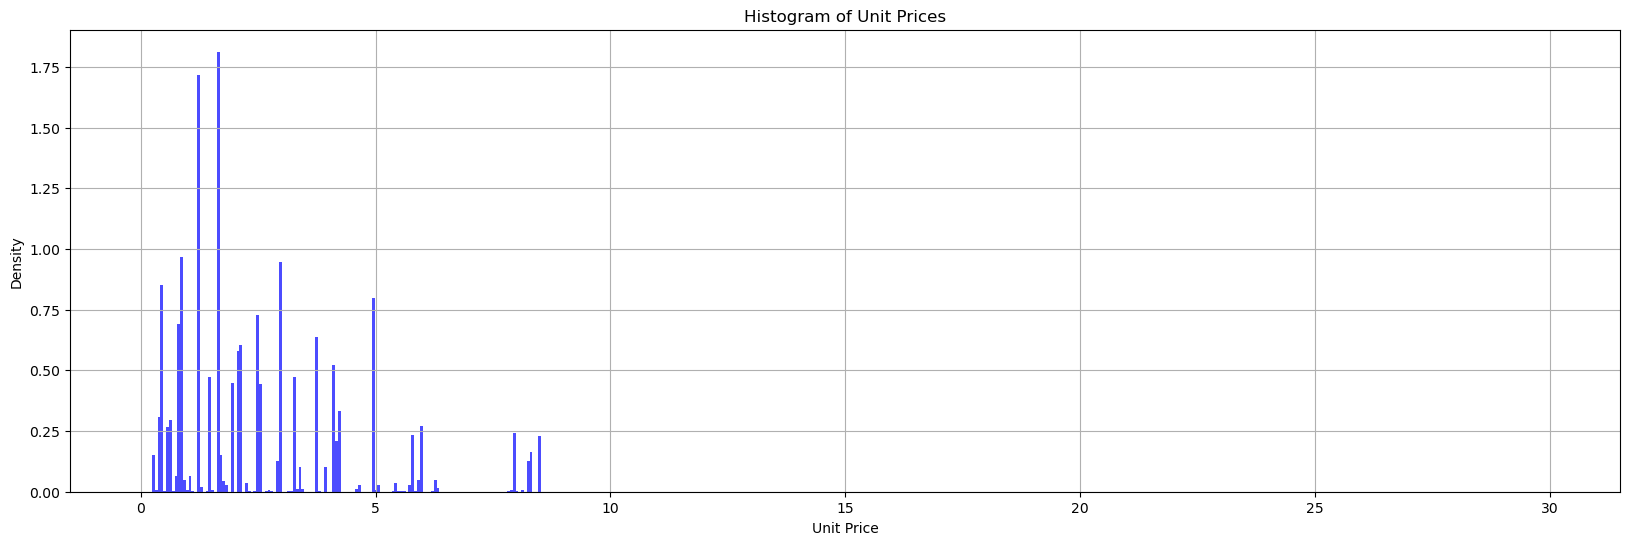

In [115]:
# plots the UnitPrice graph to demonstrate the frequency distrubition of data #
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
# bins are interval number and range can be adjusted if you want to see up to 50 or 100 # 
plt.hist(df['UnitPrice'], bins=500, alpha=0.7, color='blue', density=True, range=(0, 30))  # Adjust number of bins as needed
plt.title('Histogram of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

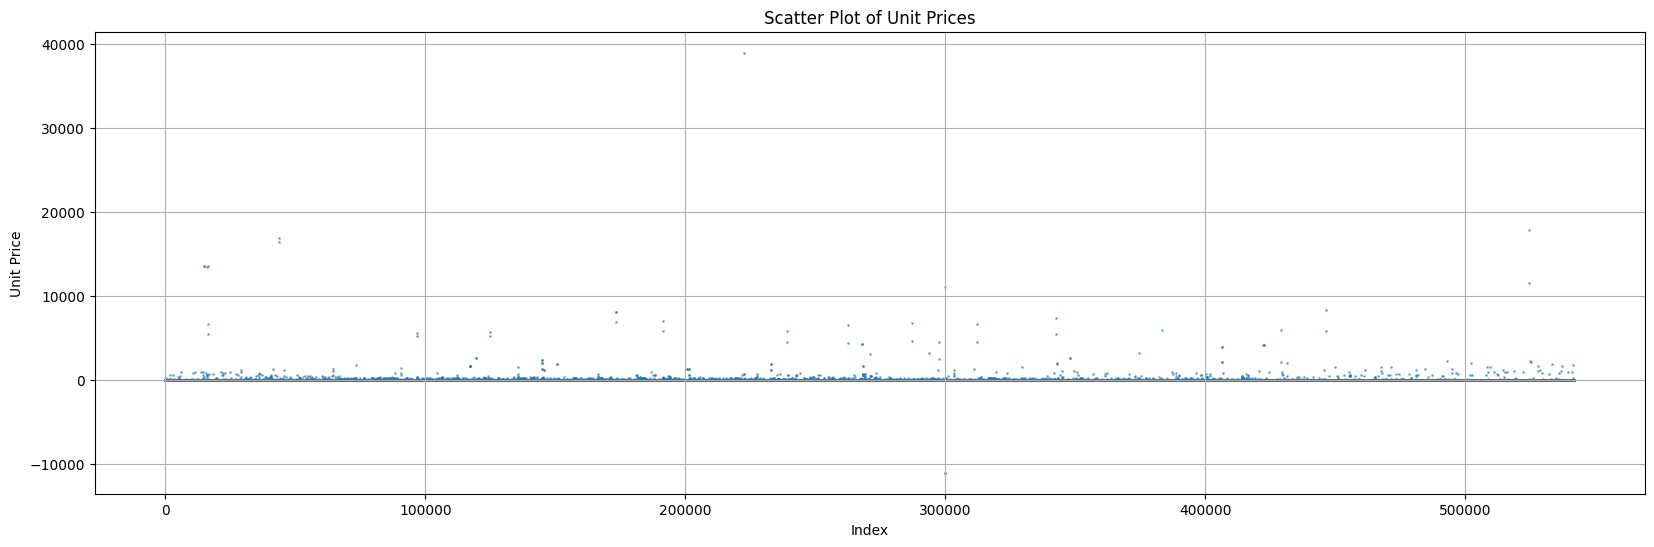

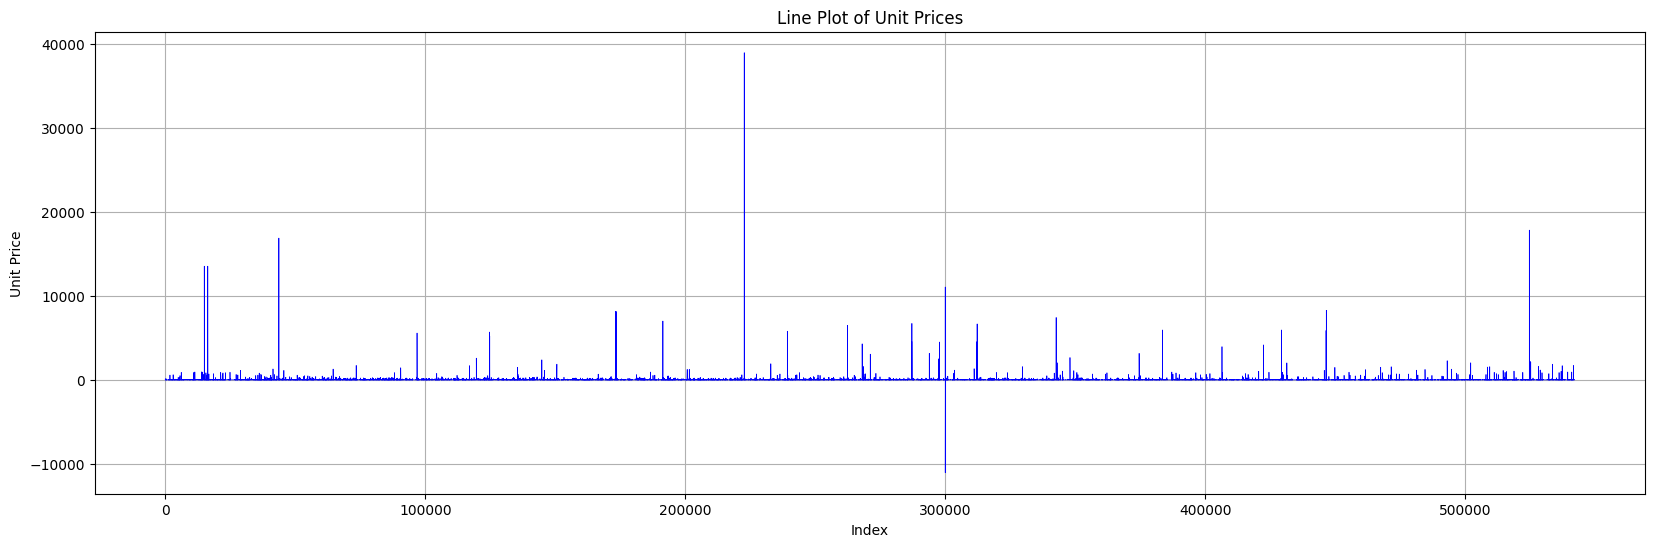

In [ ]:
unit_prices = df['UnitPrice']

# Create a scatter plot
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.scatter(range(len(unit_prices)), unit_prices, s=1, alpha=0.5)  # Plotting against index for x-axis
plt.title('Scatter Plot of Unit Prices')
plt.xlabel('Index')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()

# Create a line plot
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.plot(range(len(unit_prices)), unit_prices, color='blue', linewidth=0.5)  # Plotting against index for x-axis
plt.title('Line Plot of Unit Prices')
plt.xlabel('Index')
plt.ylabel('Unit Price')
plt.grid(True)
plt.show()

In [9]:
print(df[df['Quantity'] < 0])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

        InvoiceDate  UnitPrice  CustomerID         Country     Weight  
141               1      27.50     1452

In [ ]:
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
nltk.download('punkt')


In [11]:
import re

def delete_numbers(text):
    # Deletes numbers from the text
    pattern = r'\b\d+\b'
    if isinstance(text, str):
        text = re.sub(pattern, '', text)
    return text


Kelimeleri ayırp array halinde dataframe e yazıyor(sayıları silip öyle işlem yapıyor üstteki func kullanarak) 5dk sürdü bende ama değişir, haliyle uzun sürüyor

In [14]:
# buğradan çalntı func #

df["key_words"] = "" 
for index, row in df.iterrows():
    name = row["Description"]
    r = Rake()
    if isinstance(name, str):
        r.extract_keywords_from_text(delete_numbers(name))
        key_words_dict_scores = r.get_word_degrees()
        df.at[index, "key_words"] = list(key_words_dict_scores.keys())
print(df.head())      

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   InvoiceDate  UnitPrice  CustomerID         Country    Weight  \
0            1       2.55     17850.0  United Kingdom  0.461538   
1            1       3.39     17850.0  United Kingdom  0.461538   
2            1       2.75     17850.0  United Kingdom  0.615385   
3            1       3.39     17850.0  United Kingdom  0.461538   
4            1       3.39     17850.0  United Kingdom  0.461538   

                                    key_words  
0      [white, hanging, heart, light, holder]  
1                     [white, metal, lantern]  
2        [cream, cup

In [15]:
#Flatten the list of lists into a single list of words
all_words = [word for sublist in df["key_words"].tolist() for word in sublist]

# Count the frequency of each word
word_freq = {}
for word in all_words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Convert the dictionary to a DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=["Word", "Frequency"])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by="Frequency", ascending=False)


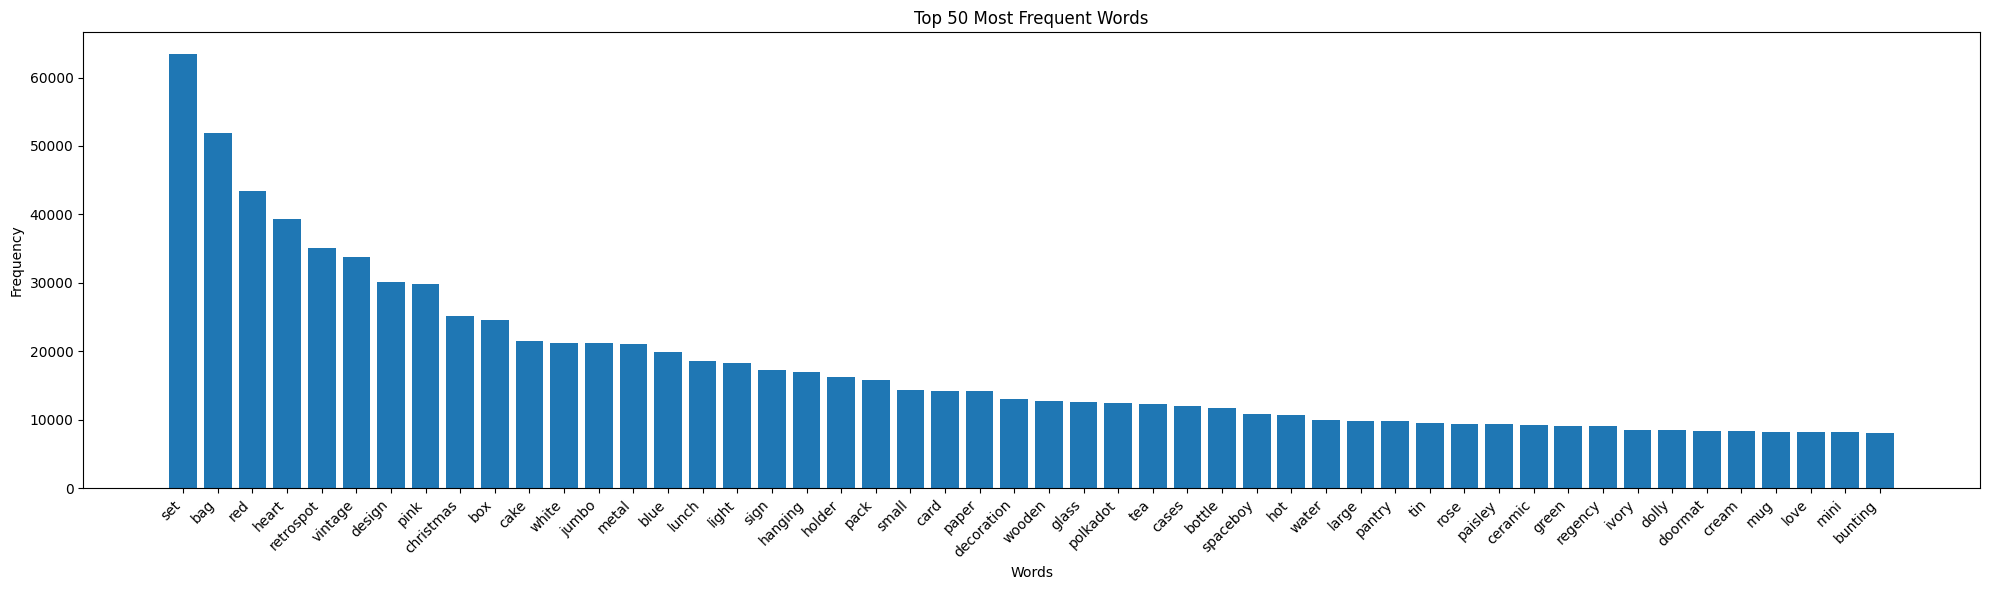

In [18]:

# Plotting
plt.figure(figsize=(20, 6))
plt.bar(word_freq_df["Word"][:50], word_freq_df["Frequency"][:50])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 50 Most Frequent Words")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [23]:
#word_freq_df.to_csv('word_freq.csv', index=False)
#df.to_csv('new_data.csv', index=False)

###################### RFM DENEMESİ #######################

In [13]:
import datetime as dt
import matplotlib.pyplot as plt

Recency kısmı hata veriyor InvoiceDate in garip tarih yazışı yüzünden (DÜZELTTİM)

In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df_recency = df.groupby(by='CustomerID', 
                        as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


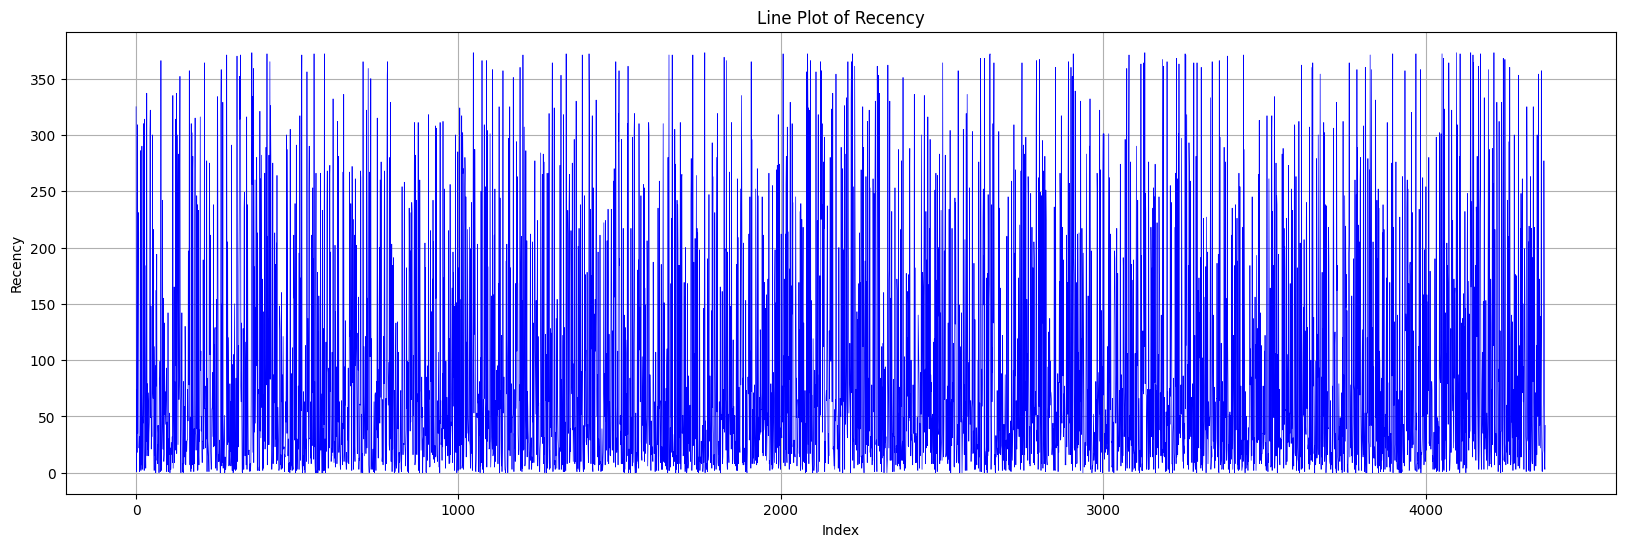

In [23]:
# Create a line plot
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.plot(range(len(df_recency['Recency'])), df_recency['Recency'], color='blue', linewidth=0.5)  # Plotting against index for x-axis
plt.title('Line Plot of Recency')
plt.xlabel('Index')
plt.ylabel('Recency')
plt.grid(True)
plt.show()

Frequency kısmı hangi kullanıcının ne sıklıkta alışveriş yaptığı sonrasında da grafiği

In [17]:
frequency_df = df.drop_duplicates().groupby(
    by=['CustomerID'], as_index=False)['InvoiceDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


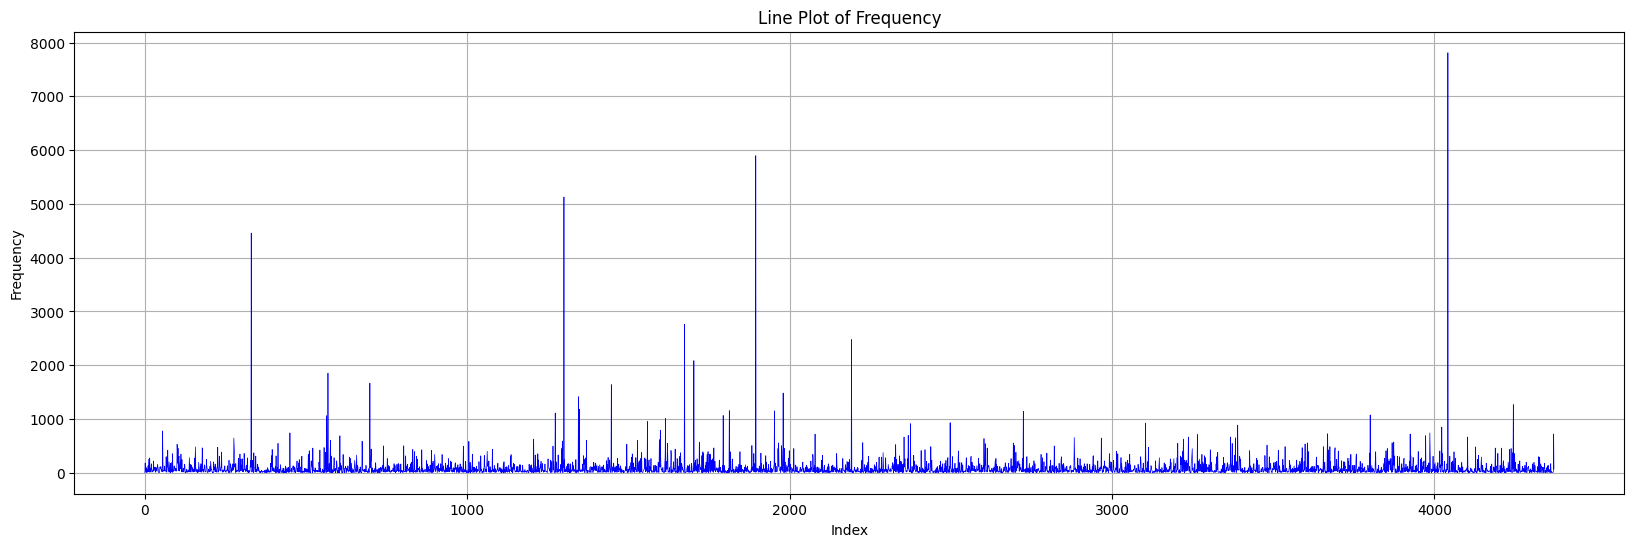

In [19]:
# Create a line plot
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.plot(range(len(frequency_df['Frequency'])), frequency_df['Frequency'], color='blue', linewidth=0.5)  # Plotting against index for x-axis
plt.title('Line Plot of Frequency')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

^ 8000 olanda sıkıntı var kesin

MONETARY KISMI

In [20]:
df['Total'] = df['UnitPrice']*df['Quantity']
monetary_df = df.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


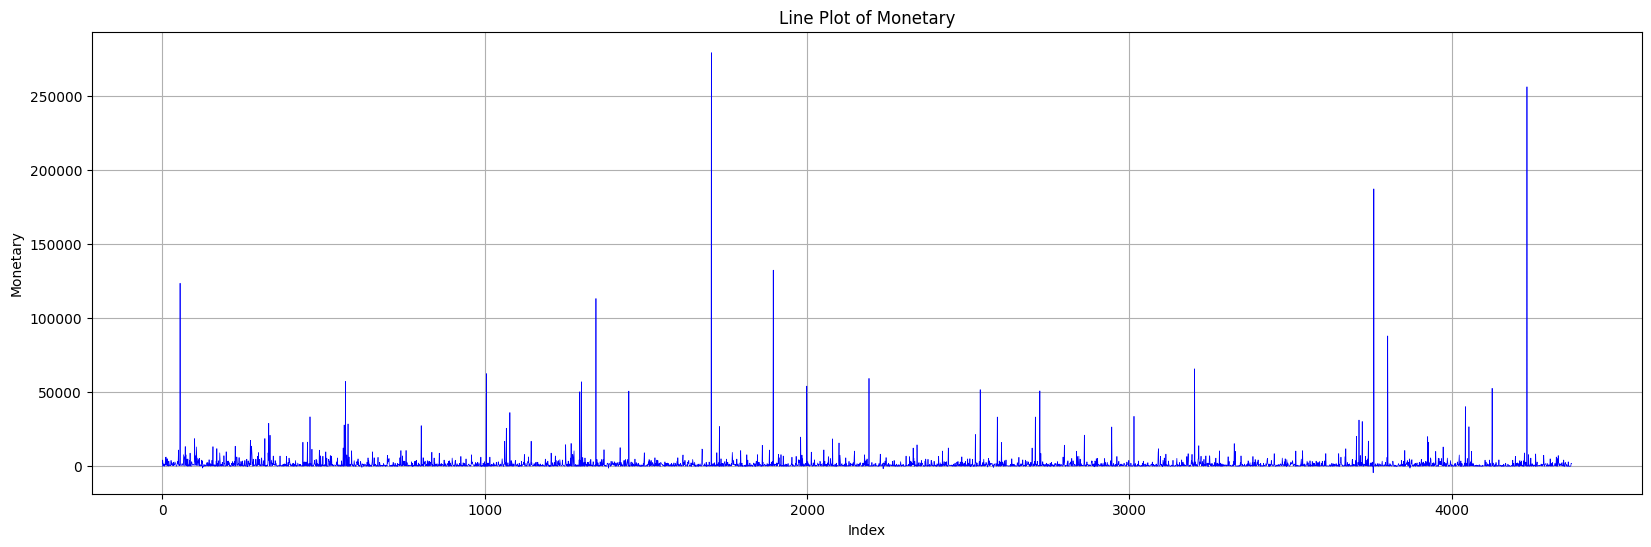

In [21]:
# Create a line plot
plt.figure(figsize=(20, 6))  # Adjust figure size if needed
plt.plot(range(len(monetary_df['Monetary'])), monetary_df['Monetary'], color='blue', linewidth=0.5)  # Plotting against index for x-axis
plt.title('Line Plot of Monetary')
plt.xlabel('Index')
plt.ylabel('Monetary')
plt.grid(True)
plt.show()

In [25]:
# merging all 3 #
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [26]:
 
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,2,0.00,3.865741,2.493138,2.493138
1,12347.0,1,182,4310.00,97.719907,88.129003,88.129003
2,12348.0,74,31,1797.24,38.182870,42.074565,42.074565
3,12349.0,18,73,1757.55,72.974537,66.720037,66.720037
4,12350.0,309,17,334.40,5.578704,24.794145,24.794145


In [27]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12346.0,0.13
1,12347.0,4.48
2,12348.0,2.07
3,12349.0,3.38
4,12350.0,1.10
5,12352.0,3.56
6,12353.0,0.34


In [28]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
									4.5, "Top Customers", 
									(np.where(
										rfm_df['RFM_Score'] > 4,
										"High value Customer",
										(np.where(
	rfm_df['RFM_Score'] > 3,
							"Medium Value Customer",
							np.where(rfm_df['RFM_Score'] > 1.6, 
							'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)


,CustomerID,RFM_Score,Customer_segment
0,12346.0,0.13,Lost Customers
1,12347.0,4.48,High value Customer
2,12348.0,2.07,Low Value Customers
3,12349.0,3.38,Medium Value Customer
4,12350.0,1.10,Lost Customers
5,12352.0,3.56,Medium Value Customer
6,12353.0,0.34,Lost Customers
7,12354.0,2.66,Low Value Customers
8,12355.0,0.93,Lost Customers
9,12356.0,3.09,Medium Value Customer


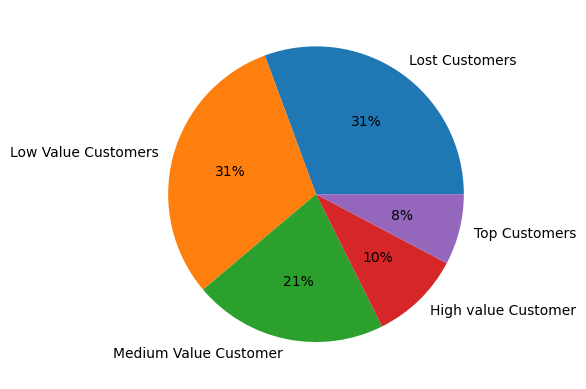

In [29]:
plt.pie(rfm_df.Customer_segment.value_counts(),
		labels=rfm_df.Customer_segment.value_counts().index,
		autopct='%.0f%%')
plt.show()
